In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass

%matplotlib inline

In [21]:
# loading the data
latencies = pd.read_csv("results_01.csv").set_index("i")

In [22]:
@dataclass
class PlotResult:
    fig: plt.Figure
    d_mean: float
    d_quantile: float
    h_mean: float
    h_quantile: float

def plot_latencies(ltc_type: str):
    d_name = f"double_{ltc_type}"
    double_data = latencies[d_name]
    d_mean = double_data.mean()
    d_quantile = double_data.quantile(0.99)
    
    h_name = f"hat_{ltc_type}"
    hat_data = latencies[h_name]
    h_mean = hat_data.mean()
    h_quantile = hat_data.quantile(0.99)
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(8, 3))

    ax1.plot(double_data, label="latencies (cycles)")
    ax1.set_title("Geometric expansion")
    ax1.axhline(d_mean, color="orange", label=f"avg ({np.around(d_mean, 2)})")
    ax1.legend()
    
    ax2.plot(hat_data, label="latencies (cycles)")
    ax2.set_title("Hashed array tree")
    ax2.axhline(h_mean, color="orange", label=f"avg ({np.around(h_mean, 2)})")
    ax2.legend()
    
    fig.savefig(f"../report/graphics/01-{ltc_type}-latencies.png", bbox_inches='tight')
    return PlotResult(fig, d_mean, d_quantile, h_mean, h_quantile)

# Append Latency

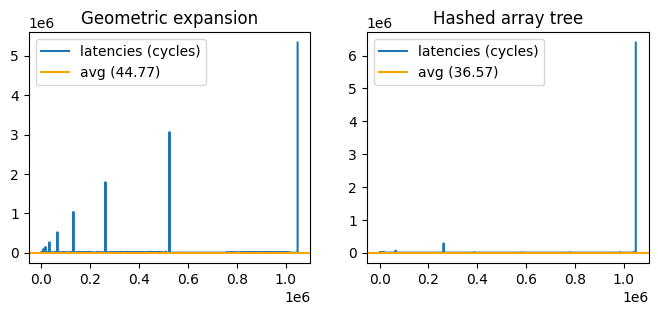

GE 	avg: 44.770920018272385 cycles
HAT 	avg: 36.571815899070835 cycles
GE 	99-percentile: 37.0 cycles
HAT 	99-percentile: 37.0 cycles


In [23]:
res = plot_latencies("push")
plt.show(res.fig)
print(f"GE \tavg: {res.d_mean} cycles")
print(f"HAT \tavg: {res.h_mean} cycles")
print(f"GE \t99-percentile: {res.d_quantile} cycles")
print(f"HAT \t99-percentile: {res.h_quantile} cycles")

# Random Access Latency

The difference between this one and the next one is that this is random access. The next one is ordered left to right.

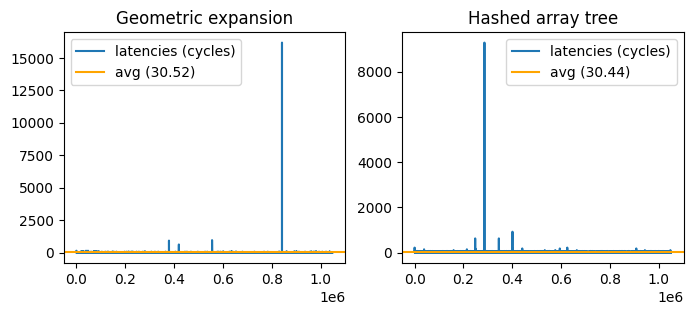

GE 	avg: 30.521757581942005 cycles
HAT 	avg: 30.43589836511768 cycles
GE 	99-percentile: 37.0 cycles
HAT 	99-percentile: 37.0 cycles


In [24]:
res = plot_latencies("get")
plt.show(res.fig)
print(f"GE \tavg: {res.d_mean} cycles")
print(f"HAT \tavg: {res.h_mean} cycles")
print(f"GE \t99-percentile: {res.d_quantile} cycles")
print(f"HAT \t99-percentile: {res.h_quantile} cycles")

# Scan Latency

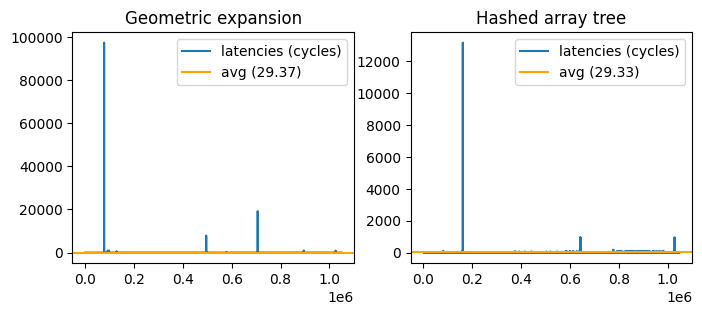

GE 	avg: 29.366720803527066 cycles
HAT 	avg: 29.327612564456402 cycles
GE 	99-percentile: 37.0 cycles
HAT 	99-percentile: 37.0 cycles


In [25]:
res = plot_latencies("scan")
plt.show(res.fig)
print(f"GE \tavg: {res.d_mean} cycles")
print(f"HAT \tavg: {res.h_mean} cycles")
print(f"GE \t99-percentile: {res.d_quantile} cycles")
print(f"HAT \t99-percentile: {res.h_quantile} cycles")

# Overall Throughput

In [26]:
latencies = pd.read_csv("results_02.csv").set_index("i")

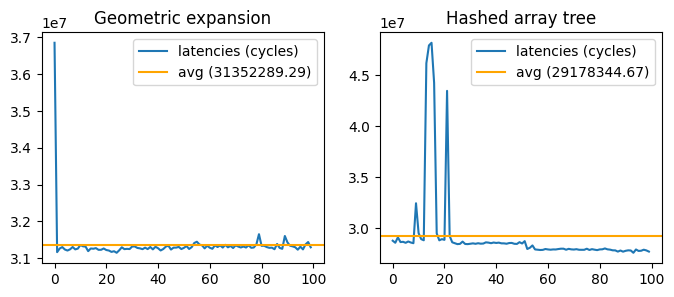

GE 	avg: 31352289.29 cycles
HAT 	avg: 29178344.67 cycles
GE 	99-percentile: 31705685.540000025 cycles
HAT 	99-percentile: 47952246.42 cycles


In [27]:
res = plot_latencies("overall")
plt.show(res.fig)
print(f"GE \tavg: {res.d_mean} cycles")
print(f"HAT \tavg: {res.h_mean} cycles")
print(f"GE \t99-percentile: {res.d_quantile} cycles")
print(f"HAT \t99-percentile: {res.h_quantile} cycles")